[49.54634475708008, 49.654998779296875, 49.81493377685547, 49.99633026123047, 50.09749221801758, 50.20551681518555, 50.27928161621094, 50.393550872802734, 50.50634002685547, 50.62358093261719, 51.96495056152344, 52.15384292602539, 52.30043029785156, 52.325096130371094, 52.38457107543945, 52.376220703125, 52.47153091430664, 52.47331619262695, 52.529510498046875, 52.58252716064453, 52.62186050415039, 52.661598205566406, 52.603519439697266, 52.695316314697266, 52.65682601928711, 52.78233337402344, 52.772727966308594, 52.79747009277344, 52.78836441040039, 52.80091094970703, 52.831207275390625, 52.86399841308594, 52.89169692993164, 52.94033432006836, 53.03779220581055, 52.95283126831055, 52.96733474731445, 53.01331329345703, 53.040225982666016, 52.96310806274414]
40
[0.5702680349349976, 6.761102676391602, 14.501636505126953, 19.655670166015625, 23.010461807250977, 25.339773178100586, 27.118640899658203, 28.475231170654297, 29.587200164794922, 30.434640884399414, 31.24344253540039, 31.925954

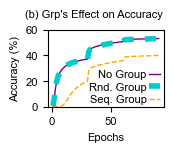

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

train_top1, train_top5, val_top1, val_top5 = [],[],[],[]
train_top1_size2 = []
train_top1_size4 = []
train_top1_size8 = []
train_top1_size16 = []
train_top1_size32 = []
train_top1_size64 = []
epochs = 0
batch_size = 0
model = ""
batch_top1_top5 = {}
batch_top1_top5_size2 = {}
batch_top1_top5_size4 = {}
batch_top1_top5_size8 = {}
batch_top1_top5_size16 = {}
batch_top1_top5_size32 = {}
batch_top1_top5_size64 = {}


short_batch = '256'
current_p = 'train_top1'
current_title = 'alexnet epoch related Training top 1 Accuracy on Large Imagenet'
process = '_trainingtop1_'

with open('alexnet_batch_256_gsize_64_epo_90grouping') as json_file:
    data = json.load(json_file)
    for k,v in data.items():
        if k == current_p:
            batch_top1_top5 = data[k]
            print(data[k])
            print(len(batch_top1_top5))
        elif k == 'model':
            model = data[k]
        elif k == 'args.epochs':
            epochs = data[k]
        elif k == 'args.batch_size':
            batch_size = data[k]
with open('alexnet_batch_256_gsize_64_epo_50grouping') as json_file:
    data = json.load(json_file)
    for k,v in data.items():
        if k == current_p:
            batch_top1_top5_size2 = data[k]
            print(data[k])
            print(len(batch_top1_top5_size2))
with open('alexnet_batch_256_epo_90_ ') as json_file:
    data = json.load(json_file)
    for k,v in data.items():
        if k == current_p:
            batch_top1_top5_size4 = data[k]
with open('alexnet_batch_256_epo_50_ ') as json_file:
    data = json.load(json_file)
    for k,v in data.items():
        if k == current_p:
            batch_top1_top5_size8 = data[k]
with open('sequential-groupingalexnet_batch_256_gsize_64_epo_90_') as json_file:
    data = json.load(json_file)
    for k,v in data.items():
        if k == current_p:
            batch_top1_top5_size16 = data[k]
with open('sequential-groupingalexnet_batch_256_gsize_64_epo_50_sequential-grouping') as json_file:
    data = json.load(json_file)
    for k,v in data.items():
        if k == current_p:
            batch_top1_top5_size32 = data[k]


def helper(batches):
    batch_range = []
    batch_top1, batch_top5 = [], []
    for k,v in batches.items():
        batch_range.append(int(k))
        batch_top1.append(v[0])
        batch_top5.append(v[1])
    return (batch_range, batch_top1, batch_top5)


for i in batch_top1_top5 :
    batch_top1_top5_size2.append(i)

for i in batch_top1_top5_size4 :
    batch_top1_top5_size8.append(i)

for i in batch_top1_top5_size16 :
    batch_top1_top5_size32.append(i)


epoch_range = range(1,epochs+1)

fontsize=8
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = fontsize

fig = plt.gcf()
fig.set_size_inches(1.5, 1)

plt.plot(epoch_range, batch_top1_top5_size8, label = 'No Group', color="purple", linewidth=1)
plt.plot(epoch_range, batch_top1_top5_size2, '--', label = 'Rnd. Group', color="#00cccc", linewidth=4, dashes=[2,2])
plt.plot(epoch_range, batch_top1_top5_size32, label = 'Seq. Group', color="orange", linewidth=1, ls="--")

plt.title("(b) Grp's Effect on Accuracy", y=1.05, x=0.4, fontsize=fontsize)
plt.xlabel('Epochs', fontsize=fontsize)
plt.ylabel('Accuracy (%)', fontsize=fontsize)
plt.ylim([0,60])
plt.legend(frameon=False, handlelength=1, handletextpad=0.2, loc="lower right", bbox_to_anchor=(1.05, -0.1), markerfirst=False, labelspacing=0.2)
plt.savefig("acc.eps", bbox_inches="tight", transparent=True)
